# DEM, Shapefile import and projection
A notebook going through different ways to import and project shape and DEM files.

In [1]:
import rioxarray
import xarray
import geopandas
import shapely.geometry
import rasterio
import rasterio.mask
import numpy
import matplotlib.pyplot

## Load in data
Note that the LiDAR (and DEMs were downloaded from OpenTopgraphy with EPSG:2193)
Horizontal Coordinates: NZGD2000 / New Zealand Transverse Mercator 2000 [EPSG: 2193]
Vertical Coordinates: NZVD2016 [EPSG: 7839]

In [15]:
# from Open Topography
dem_tiff=rioxarray.rioxarray.open_rasterio(r'C:\Users\pearsonra\Documents\data\herbert_10res\dem\dem.tif', masked=True)
dem_nc=rioxarray.rioxarray.open_rasterio(r'C:\Users\pearsonra\Documents\data\herbert_10res\dem\dem.nc', masked=True)
# from QGIS
ocean_shape = geopandas.read_file(r'C:\Users\pearsonra\Documents\data\herbert_10res\fake_coast.shp')
ocean_shape_projected = geopandas.read_file(r'C:\Users\pearsonra\Documents\data\herbert_10res\ocean_shape_projected.shp')

## View and correct projections
### Projection for DEMs

In [3]:
dem_tiff.rio.crs

CRS.from_epsg(2193)

In [4]:
dem_nc.rio.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["unknown",DATUM["unnamed",SPHEROID["Spheroid",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",173],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1600000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

#### Correct netCDF crs 
note the correction is needed due to export setting incorrectly being selected from QGIS - skip this stage in future and just bring into xarray (same as nextCDF anyway)

In [5]:
dem_nc=dem_nc.rio.set_crs(2193)

### Projection from Shape files

In [6]:
ocean_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
ocean_shape_projected.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - onshore
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### correct unprojected shapefile crs 
reproject the QGIS polygon

In [8]:
ocean_shape = ocean_shape.to_crs("epsg:2193")

## View DEM and select region to filter
Below the dem and the ocean shape file - saved out of QGIS with a projection.

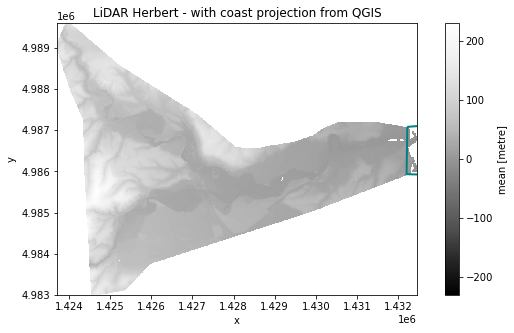

In [10]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 5))
dem_tiff.plot(cmap="Greys_r",
                 ax=ax)
ocean_shape.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax,
                    zorder=4)
ax.set_title("LiDAR Herbert - with coast projection from QGIS")
#ax.set_axis_off()
matplotlib.pyplot.show()

The DEM zoomed in on the region to manually create a polygon here

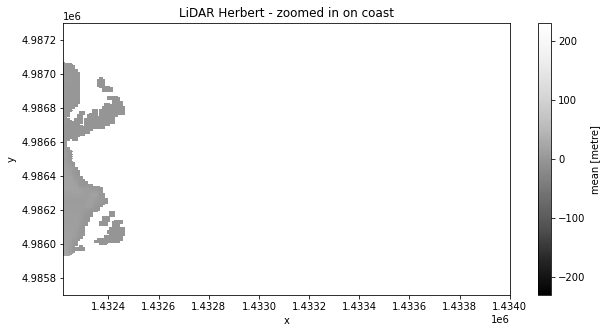

In [11]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 5))

dem_tiff.plot(cmap="Greys_r", ax=ax)

ax.set_title("LiDAR Herbert - zoomed in on coast")
matplotlib.pyplot.xlim([1.43222e6, 1.434e6])
matplotlib.pyplot.ylim([4.9857e6, 4.9873e6])

matplotlib.pyplot.show()

## Manually create a polygon

In [12]:
ocean_manual_shape = shapely.geometry.Polygon([(1.43222e6, 4.9857e6), # x1, y1
            (1.43400e6, 4.9857e6), # x2, y1
            (1.43400e6, 4.9873e6), # x2, y2
            (1.43222e6, 4.9873e6)  # x1, y2
        ])
ocean_manual_gdf = geopandas.GeoSeries([ocean_manual_shape])

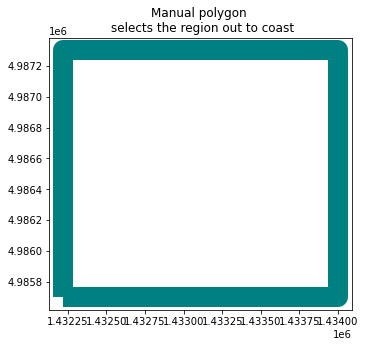

In [14]:
# Plot the data and notice that the scale bar looks better
# No data values are now masked
f, ax = matplotlib.pyplot.subplots(figsize=(10, 5))

ocean_manual_gdf.plot(color='None', edgecolor='teal', linewidth=20, ax=ax, zorder=4)

ax.set_title("Manual polygon \n selects the region out to coast")
matplotlib.pyplot.show()

## Plot both together

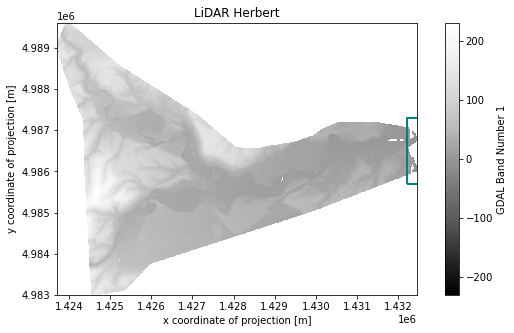

In [83]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 5))

dem_initial.plot(cmap="Greys_r", ax=ax)
ocean_manual_gdf.plot(color='None', edgecolor='teal', linewidth=2, ax=ax, zorder=4)

ax.set_title("LiDAR Herbert")
matplotlib.pyplot.show()